In [2]:
SMALL_SIZE, MEDIUM_SIZE = 9, 12
PROJECT_PATH = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"

In [3]:
import sys
import numpy as np
from glob import glob
import random, matplotlib
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

sys.path.append(PROJECT_PATH)
from utils.data import Dataset


In [66]:
import utils.figure as ufigure
# %load_ext autoreload
%autoreload 1
%aimport utils.data
%aimport utils.figure

In [67]:
Data = Dataset(PROJECT_PATH, 'final')
Data.load_data()

Loading INFO.yaml ...
Finished loading INFO
Loading config.yaml ...
Finished loading config


100%|██████████| 141/141 [00:02<00:00, 54.60it/s]


In [68]:
# configuration
INFO_values = Data.info_values
config = Data.config
skeleton = config['skeleton']
skeleton_color= config['skeleton_color']

# features
bp = Data.data_obj['bodypoints']
rot_bp = Data.data_obj['rotated_bodypoints']
angles = Data.data_obj['angles']
limbs = Data.data_obj['limbs']
angle_power = Data.data_obj['angle_power']
limb_power = Data.data_obj['limb_power']

# embeddings
all_embed = Data.data_obj['all_embeddings']
all_postural_embed = Data.data_obj['all_postural_embeddings']
all_kinematic_embed = Data.data_obj['all_kinematic_embeddings']

<hr><hr>

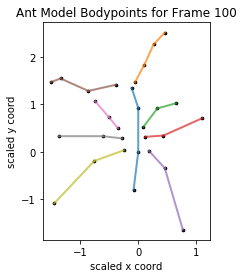

In [35]:
ufigure.ant_model(rot_bp, skeleton, skeleton_color, fr=100)

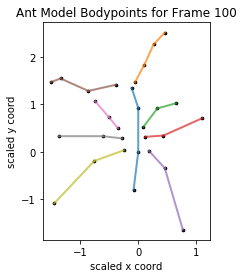

In [53]:
ufigure.ant_model(rot_bp, skeleton, skeleton_color, fr=100)

<hr>

In [37]:
from helper import angle_calc
%aimport helper

In [69]:
bp

array([[[ 75.1 ,  97.5 ,   1.  ],
        [ 75.44,  87.06,   1.  ],
        [ 81.56,  65.9 ,   1.  ],
        ...,
        [ 64.25,  46.03,   1.  ],
        [ 68.6 ,  62.5 ,   1.  ],
        [ 77.7 ,  66.56,   1.  ]],

       [[ 76.8 ,  92.9 ,   1.  ],
        [ 73.2 ,  83.5 ,   1.  ],
        [ 79.5 ,  60.66,   1.  ],
        ...,
        [ 64.9 ,  33.16,   1.  ],
        [ 68.25,  56.06,   1.  ],
        [ 78.1 ,  61.47,   1.  ]],

       [[ 75.5 ,  92.  ,   1.  ],
        [ 72.6 ,  85.1 ,   1.  ],
        [ 76.25,  60.72,   1.  ],
        ...,
        [ 63.06,  34.  ,   1.  ],
        [ 65.56,  55.56,   1.  ],
        [ 75.  ,  61.72,   1.  ]],

       ...,

       [[ 55.94,  73.9 ,   1.  ],
        [ 63.5 ,  74.25,   1.  ],
        [ 81.75,  76.25,   1.  ],
        ...,
        [102.  ,  59.34,   1.  ],
        [ 91.25,  67.3 ,   1.  ],
        [ 82.94,  72.06,   1.  ]],

       [[ 57.22,  74.94,   1.  ],
        [ 64.6 ,  70.8 ,   1.  ],
        [ 83.1 ,  75.75,   1.  ],
        .

In [49]:
angles[:,:,0] = angle_calc(rot_bp[:,:,0:2], config['angles'])

0
34


/Users/donghur/Desktop/Research/Murthy/BM_GPU/helper.py:39: RuntimeWarning: invalid value encountered in true_divide
  bc = c - b


144


/Users/donghur/Desktop/Research/Murthy/BM_GPU/helper.py:40: RuntimeWarning: invalid value encountered in arccos
  


98
0
0
37
151
98
0
0
37


In [ ]:
a = data[:,ele['a'],:]
b = data[:,ele['b'],:]
c = data[:,ele['c'],:]

ba = a - b
bc = c - b
test = np.where((np.linalg.norm(ba, axis=-1) * np.linalg.norm(bc, axis=-1))==0)[0]
print(len(test))
cosine_angle = np.sum(ba*bc,axis=-1)/ (np.linalg.norm(ba, axis=-1) * np.linalg.norm(bc, axis=-1))
angles[:,feat] = np.arccos(cosine_angle)/np.pi # normalize